<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/Unsupervisedlearning_PCA_hierarchicalclustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster
from sklearn.datasets import make_blobs

In [ ]:
tip = pd.read_csv('/content/tips.csv')

In [ ]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
tip.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [ ]:
tip.duplicated().sum()

np.int64(1)

In [ ]:
tip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in tip.select_dtypes(include=['object']).columns:
  tip[i] = le.fit_transform(tip[i])

In [ ]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4
...,...,...,...,...,...,...,...
239,29.03,5.92,1,0,1,0,3
240,27.18,2.00,0,1,1,0,2
241,22.67,2.00,1,1,1,0,2
242,17.82,1.75,1,0,1,0,2


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
for i in tip.columns:
  tip[i] = sc.fit_transform(tip[[i]])

In [ ]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,-0.314711,-1.439947,-1.343353,-0.784789,0.279158,-0.621582,-0.600193
1,-1.063235,-0.969205,0.744406,-0.784789,0.279158,-0.621582,0.453383
2,0.137780,0.363356,0.744406,-0.784789,0.279158,-0.621582,0.453383
3,0.438315,0.225754,0.744406,-0.784789,0.279158,-0.621582,-0.600193
4,0.540745,0.443020,-1.343353,-0.784789,0.279158,-0.621582,1.506958
...,...,...,...,...,...,...,...
239,1.040511,2.115963,0.744406,-0.784789,-0.802024,-0.621582,0.453383
240,0.832275,-0.722971,-1.343353,1.274228,-0.802024,-0.621582,-0.600193
241,0.324630,-0.722971,0.744406,1.274228,-0.802024,-0.621582,-0.600193
242,-0.221287,-0.904026,0.744406,-0.784789,-0.802024,-0.621582,-0.600193


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
x_pca = pca.fit(tip)
x_pca

PCA(n_components=2)

In [ ]:
Z = linkage(x_pca.transform(tip), method = 'ward')

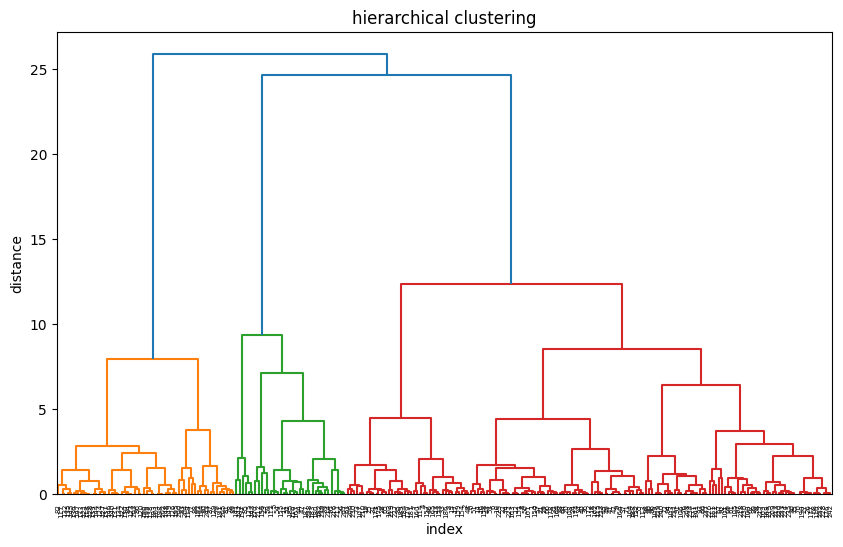

In [ ]:
plt.figure(figsize=(10,6))
dendrogram(Z)
plt.title('hierarchical clustering')
plt.xlabel('index')
plt.ylabel('distance')
plt.show()

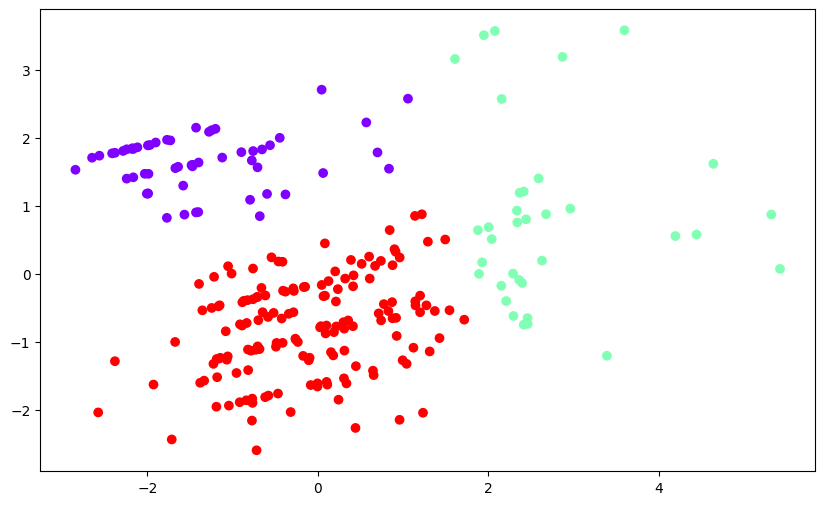

In [ ]:
cluster = fcluster(Z,t=3,criterion = 'maxclust')
plt.figure(figsize=(10,6))
x_pca_transformed = x_pca.transform(tip)
plt.scatter(x_pca_transformed[:,0], x_pca_transformed[:,1], c=cluster, cmap='rainbow')